# Analyzing, and Visualizing Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


In [2]:
df=pd.read_csv('twitter_archive_master.csv')

In [8]:
df.head()


,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,txt_splt,Extracted_name,jpg_url,img_num,dog_type,favorite_count,retweet_count
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,"['This', 'is', 'Phineas.', ""He's"", 'a', 'mysti...",Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,37986,8302
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,"['This', 'is', 'Tilly.', ""She's"", 'just', 'che...",Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,32611,6130
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,"['This', 'is', 'Archie.', 'He', 'is', 'a', 'ra...",Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,24556,4058
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,"['This', 'is', 'Darla.', 'She', 'commenced', '...",Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,41324,8442
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,"['This', 'is', 'Franklin.', 'He', 'would', 'li...",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,39502,9147


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df.dtypes

Unnamed: 0                     int64
tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator             int64
name                          object
txt_splt                      object
Extracted_name                object
jpg_url                       object
img_num                        int64
dog_type                      object
favorite_count                 int64
retweet_count                  int64
dtype: object

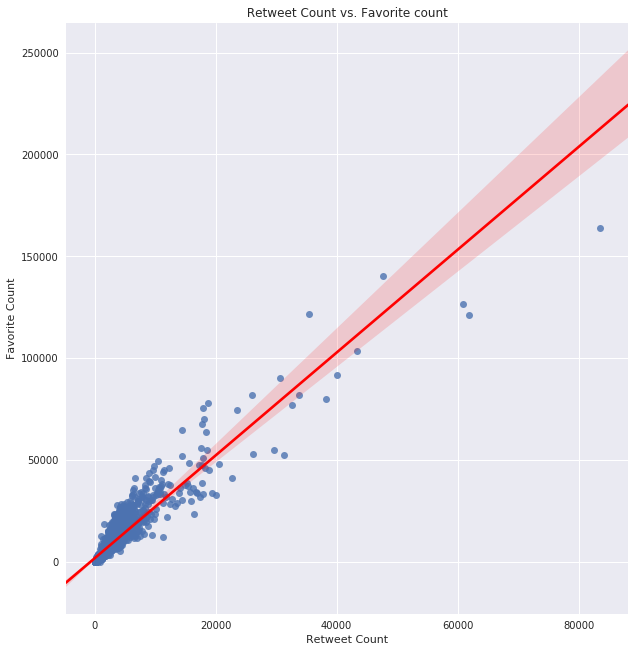

In [17]:
sns.set(color_codes=True)
sns.lmplot(x="retweet_count",y="favorite_count", data=df, size = 9, line_kws={'color': 'red'})
plt.title(' Retweet Count vs. Favorite count ')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');
plt.savefig('Retweet Count vs. Favorite count.png')


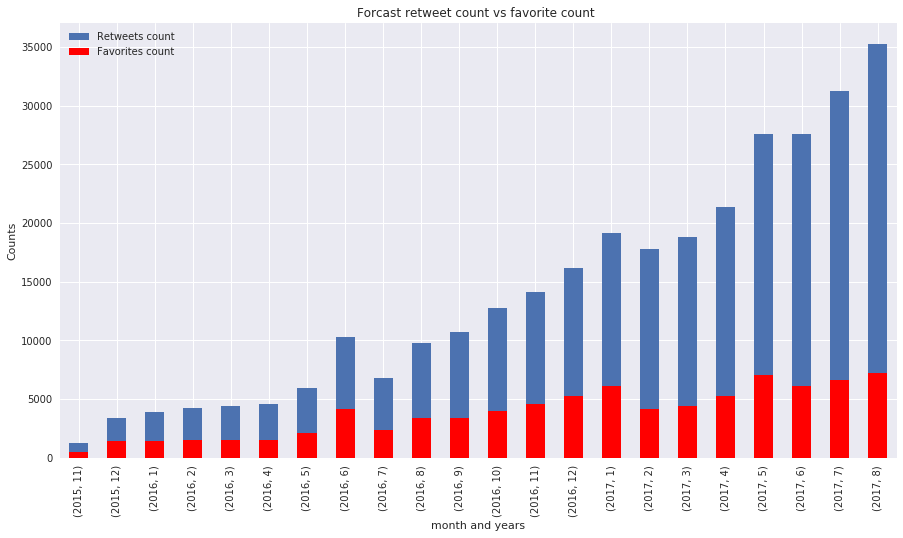

In [15]:
fig = plt.figure(figsize=(15,8))
df['favorite_count'].groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('bar').set_ylim(0, )
df['retweet_count'].groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('bar',color='red')
plt.legend(('Retweets count', 'Favorites count')) 
plt.title('Forcast retweet count vs favorite count ')
plt.ylabel('Counts')
plt.xlabel('month and years') 
plt.savefig('Forcast retweet count vs favorite count.png')


In [18]:
df.favorite_count.corr(df.retweet_count)

0.92963445620409624

In [77]:
df['favorite_count'].describe()

count       692.000000
mean      16284.377168
std       15155.876710
min           0.000000
25%        7806.750000
50%       12425.000000
75%       21483.000000
max      140174.000000
Name: favorite_count, dtype: float64

In [78]:
df['retweet_count'].describe()

count      692.000000
mean      4980.871387
std       5587.125889
min         23.000000
25%       2189.750000
50%       3418.000000
75%       5490.500000
max      60866.000000
Name: retweet_count, dtype: float64

In [102]:
#top 5 popular Name
df['Extracted_name'].value_counts().head(5)


Charlie    6
Tucker     5
Penny      5
Daisy      4
Bo         4
Name: Extracted_name, dtype: int64

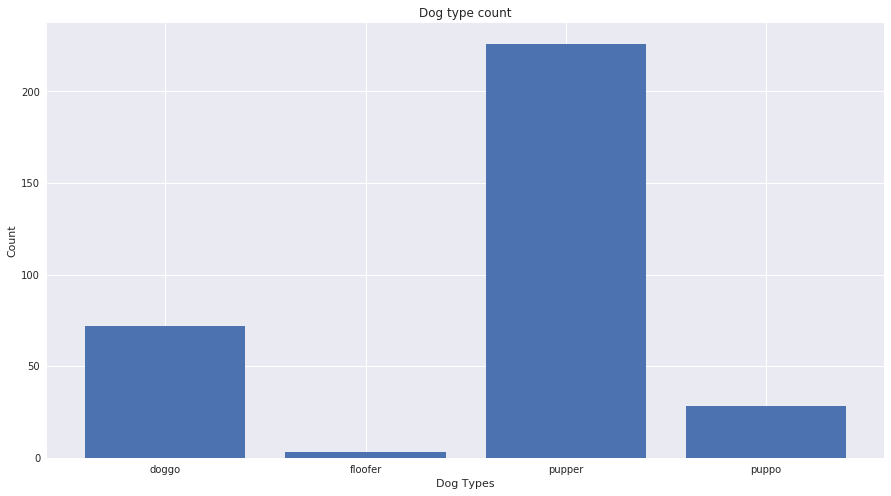

In [13]:
 plt.subplots(figsize=(15, 8))
plt.bar([1, 2, 3, 4], df.groupby('dog_type')['tweet_id'].count(), tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Dog type count')
plt.xlabel('Dog Types')
plt.ylabel('Count');
plt.savefig('Dog_Types.png')


In [14]:
df.groupby('dog_type')['tweet_id'].count()

dog_type
doggo       72
floofer      3
pupper     226
puppo       28
Name: tweet_id, dtype: int64

In [80]:
df.dtypes

Unnamed: 0                        int64
tweet_id                          int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                float64
rating_denominator              float64
name                             object
favorite_count                    int64
retweet_count                     int64
jpg_url                          object
img_num                           int64
dog_type                         object
txt_splt                         object
Extracted_name                   object
dtype: object

In [11]:
pd.set_option('max_colwidth', 800)
index=df['favorite_count'].nlargest(5).index 
heigh_faviort_dog = df[['tweet_id','name','timestamp','favorite_count','dog_type','jpg_url','Extracted_name']].iloc[index]
heigh_faviort_dog



,tweet_id,name,timestamp,favorite_count,dog_type,jpg_url,Extracted_name
785,744234799360020481,NaN,2016-06-18 18:26:18,164005,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,NaN
317,822872901745569793,NaN,2017-01-21 18:26:02,140166,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,NaN
408,807106840509214720,Stephan,2016-12-09 06:17:20,126822,NaN,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Stephan
110,866450705531457537,Jamesy,2017-05-22 00:28:40,121776,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,Jamesy
820,739238157791694849,NaN,2016-06-04 23:31:25,121151,doggo,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,NaN


<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg" height="300" width="300">

<b>Stephan</b>

<img src="https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg" height="300" width="300">

<b>Jamesy</b>

<img src="https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg" height="300" width="300">